## Simple Neural Network

Let's use linear function to create ideal dataset (without noise) and model simple neural network to predict test dataset $$f(x) = ax_1 + bx_2$$, where `a` and `b` are constants.

Epoch: 1, Training Loss: 55.413360595703125, Validation Loss: 4.9666948318481445
Epoch: 2, Training Loss: 54.71503829956055, Validation Loss: 4.9050984382629395
Epoch: 3, Training Loss: 54.05836486816406, Validation Loss: 4.846907138824463
Epoch: 4, Training Loss: 53.43815231323242, Validation Loss: 4.791686058044434
Epoch: 5, Training Loss: 52.849693298339844, Validation Loss: 4.73903751373291
Epoch: 6, Training Loss: 52.28862762451172, Validation Loss: 4.688609600067139
Epoch: 7, Training Loss: 51.751319885253906, Validation Loss: 4.640100479125977
Epoch: 8, Training Loss: 51.23460388183594, Validation Loss: 4.593230247497559
Epoch: 9, Training Loss: 50.73545837402344, Validation Loss: 4.547743320465088
Epoch: 10, Training Loss: 50.25115966796875, Validation Loss: 4.503411769866943
Epoch: 11, Training Loss: 49.779300689697266, Validation Loss: 4.460020065307617
Epoch: 12, Training Loss: 49.317649841308594, Validation Loss: 4.4174394607543945
Epoch: 13, Training Loss: 48.8641052246093

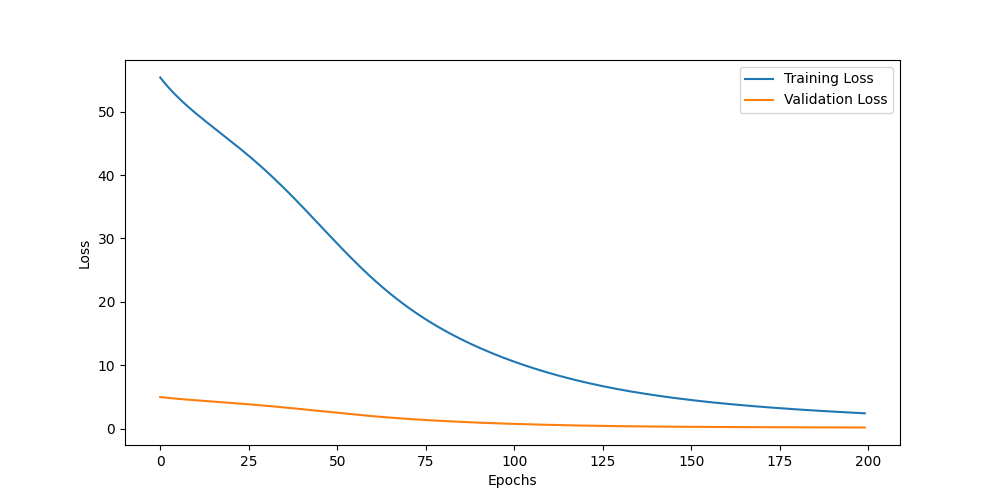

In [1]:
%matplotlib widget  
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the linear function
def f(x, a, b):
    f = a * x[:,0] + b * x[:,1]
    return f.unsqueeze(1)

# Define the constants a, b, and c
a, b = 2, 1

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # 2 input features, 3 nodes in hidden layer
        self.fc2 = nn.Linear(3, 1)   # 3 nodes in hidden layer, 1 output node

    def forward(self, x):
        y1 = self.fc1(x)
        y2 = torch.relu(y1)
        y = self.fc2(y2)
        return y

# Create the network
net = Net()

# Create a synthetic dataset
x_train = torch.randn(10000, 2)
# y_train = (2*x_train[:,0] + x_train[:,1]).unsqueeze(1) #torch.sum(x_train, axis=1).view(-1, 1)
y_train = f(x_train, a, b)

x_val = torch.randn(200, 2)
# y_val = (2*x_val[:,0]+x_val[:,1]).unsqueeze(1)
y_val = f(x_val, a, b)

# Define a loss function and an optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

# Prepare lists to save the losses
train_losses = []
val_losses = []

c = 10

# Train the network
for epoch in range(200):  # loop over the dataset multiple times
    net.train()
    optimizer.zero_grad()   # zero the gradient buffers
    y_predict = net(x_train)   # forward pass
    loss = c*criterion(y_predict, y_train)  # compute loss
    loss.backward()         # backpropagation
    optimizer.step()        # update weights

    net.eval()
    with torch.no_grad():
        val_output = net(x_val)
        val_loss = criterion(val_output, y_val)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f'Epoch: {epoch+1}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

print('Finished Training')

# Save the model
torch.save(net.state_dict(), 'SimpleNNmodel.pth')

# Plot the training and validation losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("minibatch_loss.png")
plt.show()


In [ ]:
# Load the model
model = Net()
model.load_state_dict(torch.load('SimpleNNmodel.pth'))

x_test = torch.randn(1,2)
y_expected = f(x_test, a, b)
print("x_test : ",x_test)
print("y_expected : ",y_expected)

y_predicted = model(x_test)
print("y_predicted : ",y_predicted)


In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
x_test = torch.randn(1000,2)
y_predicted = model(x_test)

ax.scatter(x_test[:,0], x_test[:,1], f(x_test, a, b), c='b', marker='o')
ax.scatter(x_test[:,0], x_test[:,1], y_predicted.detach(), c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

plt.show()